In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
import seaborn as sns
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import DenseNet121
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import InceptionV3
import os
from random import shuffle
from tensorflow.keras.models import Model
from tqdm import tqdm
import glob
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from keras.utils import model_to_dot
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from IPython.display import SVG
from keras.utils import plot_model
import cv2
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras import Sequential
import matplotlib

In [2]:
size = 224
path = "blood-cells/dataset2-master/dataset2-master/images/TRAIN/"

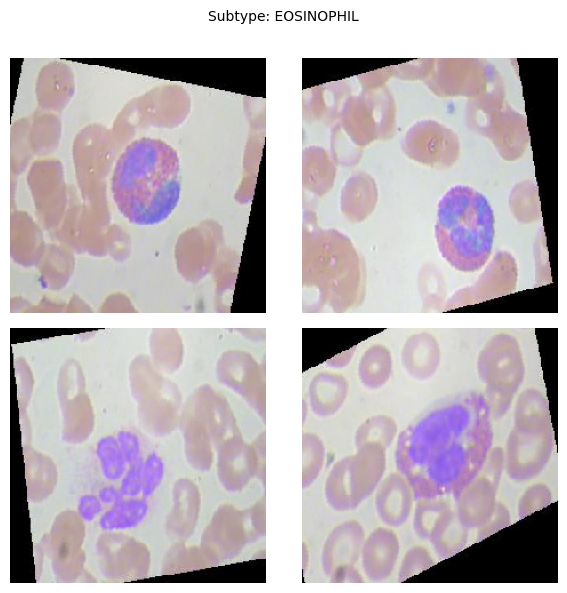

In [3]:
subtype = 'EOSINOPHIL'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: EOSINOPHIL', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

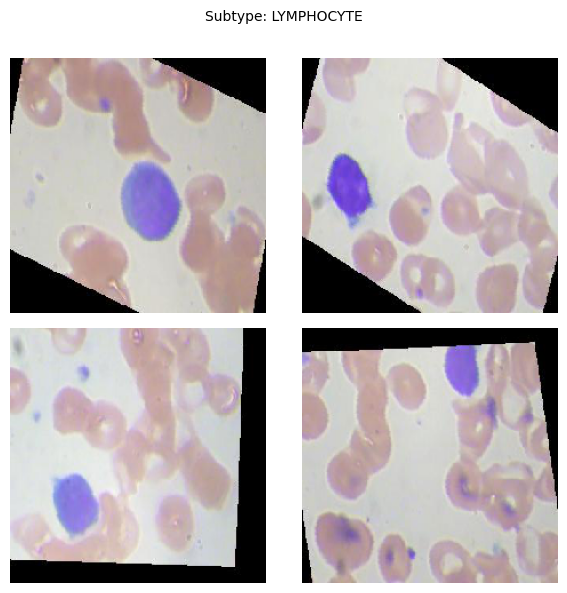

In [4]:
subtype = 'LYMPHOCYTE'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: LYMPHOCYTE', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

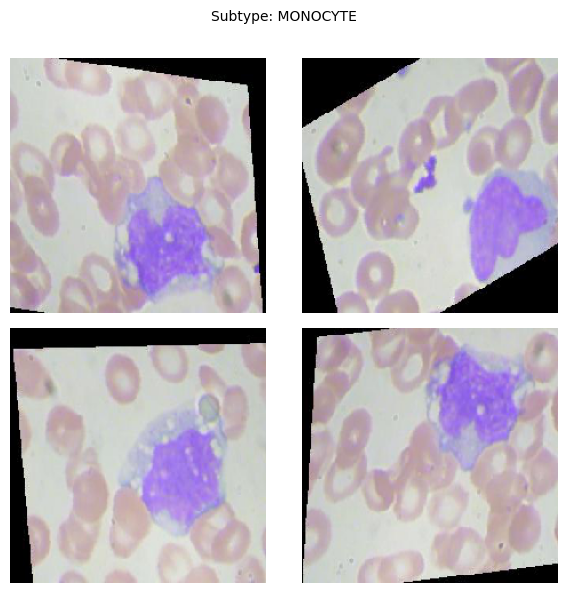

In [5]:
subtype = 'MONOCYTE'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: MONOCYTE', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

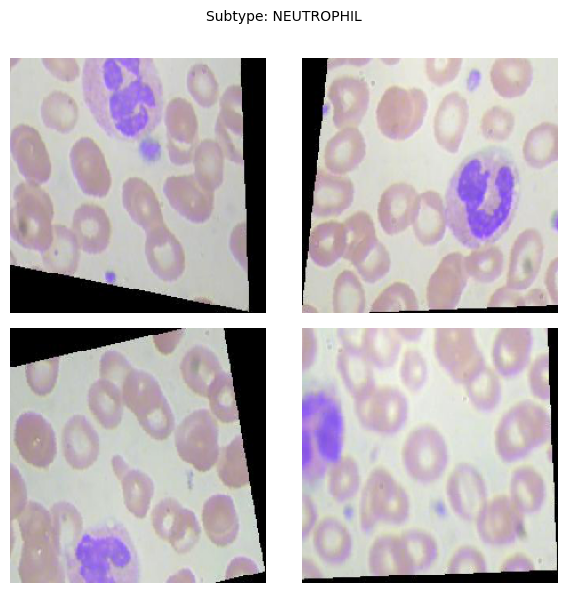

In [6]:
subtype = 'NEUTROPHIL'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: NEUTROPHIL', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [7]:
dirlist=['blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL', 
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE',
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE',
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL']

classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

filepaths=[]; labels=[]

for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)

In [8]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)

In [9]:
df

,filepaths,labels
0,blood-cells/dataset2-master/dataset2-master/im...,EOSINOPHIL
1,blood-cells/dataset2-master/dataset2-master/im...,EOSINOPHIL
2,blood-cells/dataset2-master/dataset2-master/im...,EOSINOPHIL
3,blood-cells/dataset2-master/dataset2-master/im...,EOSINOPHIL
4,blood-cells/dataset2-master/dataset2-master/im...,EOSINOPHIL
...,...,...
9952,blood-cells/dataset2-master/dataset2-master/im...,NEUTROPHIL
9953,blood-cells/dataset2-master/dataset2-master/im...,NEUTROPHIL
9954,blood-cells/dataset2-master/dataset2-master/im...,NEUTROPHIL
9955,blood-cells/dataset2-master/dataset2-master/im...,NEUTROPHIL


In [10]:
print('Total number of images in the datase:', df.shape[0])

Total number of images in the datase: 9957


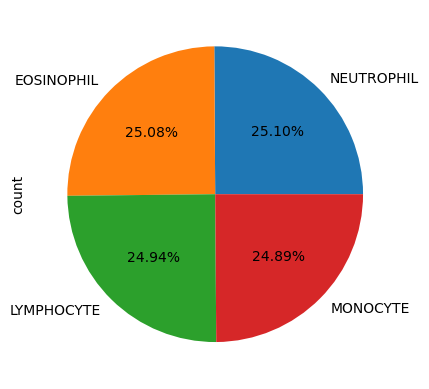

In [11]:
df['labels'].value_counts().plot(kind="pie", autopct='%.2f%%')
plt.show()

In [12]:
df['labels'].value_counts()

labels
NEUTROPHIL    2499
EOSINOPHIL    2497
LYMPHOCYTE    2483
MONOCYTE      2478
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

In [14]:
df

,filepaths,labels
0,blood-cells/dataset2-master/dataset2-master/im...,0
1,blood-cells/dataset2-master/dataset2-master/im...,0
2,blood-cells/dataset2-master/dataset2-master/im...,0
3,blood-cells/dataset2-master/dataset2-master/im...,0
4,blood-cells/dataset2-master/dataset2-master/im...,0
...,...,...
9952,blood-cells/dataset2-master/dataset2-master/im...,3
9953,blood-cells/dataset2-master/dataset2-master/im...,3
9954,blood-cells/dataset2-master/dataset2-master/im...,3
9955,blood-cells/dataset2-master/dataset2-master/im...,3


In [15]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,filepaths,labels
0,blood-cells/dataset2-master/dataset2-master/im...,1
1,blood-cells/dataset2-master/dataset2-master/im...,1
2,blood-cells/dataset2-master/dataset2-master/im...,2
3,blood-cells/dataset2-master/dataset2-master/im...,1
4,blood-cells/dataset2-master/dataset2-master/im...,1
...,...,...
9952,blood-cells/dataset2-master/dataset2-master/im...,2
9953,blood-cells/dataset2-master/dataset2-master/im...,2
9954,blood-cells/dataset2-master/dataset2-master/im...,2
9955,blood-cells/dataset2-master/dataset2-master/im...,0


In [16]:
def process_image(image_path, target_size):
    """Load and resize an image from the given path."""
    resized_image = load_img(image_path, target_size=target_size)
    return img_to_array(resized_image)

image_data = []
image_labels = []

for _, record in df.iterrows():
    image_path = record['filepaths']
    image_label = record['labels']

    image_data.append(process_image(image_path, (75,75)))
    image_labels.append(image_label)

In [17]:
image_data[0].shape

(75, 75, 3)

In [18]:
image_data = np.array(image_data, dtype="float32") / 255.0
image_labels = np.array(image_labels)

In [19]:
num_classes = len(classes)
image_labels = to_categorical(image_labels, num_classes=num_classes)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, 
                                                    random_state=42, stratify=image_labels)

In [21]:
x_train.shape

(7965, 75, 75, 3)

In [22]:
x_test.shape

(1992, 75, 75, 3)

<H3>Scratch Model</H3>

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [24]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 30s 108ms/step - loss: 1.3895 - accuracy: 0.2431 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 2/10
249/249 [==============================] - 26s 105ms/step - loss: 1.3867 - accuracy: 0.2566 - val_loss: 1.3831 - val_accuracy: 0.2786
Epoch 3/10
249/249 [==============================] - 26s 104ms/step - loss: 1.3520 - accuracy: 0.3163 - val_loss: 1.2557 - val_accuracy: 0.4478
Epoch 4/10
249/249 [==============================] - 25s 101ms/step - loss: 1.1027 - accuracy: 0.4869 - val_loss: 0.9196 - val_accuracy: 0.5673
Epoch 5/10
249/249 [==============================] - 26s 104ms/step - loss: 0.8314 - accuracy: 0.6153 - val_loss: 0.6737 - val_accuracy: 0.6958
Epoch 6/10
249/249 [==============================] - 26s 103ms/step - loss: 0.6700 - accuracy: 0.6977 - val_loss: 0.6441 - val_accuracy: 0.7003
Epoch 7/10
249/249 [==============================] - 26s 104ms/step - loss: 0.5574 - accuracy: 0.7420 - val_loss: 0.6444 - val_ac

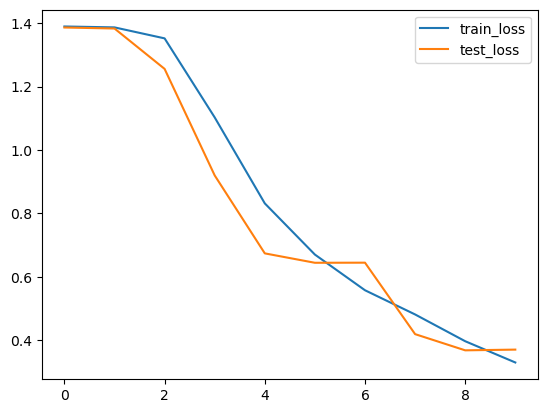

In [25]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.legend() 
plt.show()

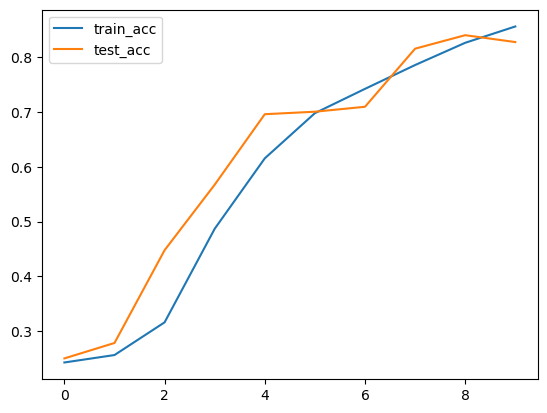

In [26]:
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

<h3>ResNet50 Implementation</h3>

In [42]:
model = ResNet50(weights=None, input_shape=(75,75,3), classes=4)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 81, 81, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 38, 38, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 38, 38, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [43]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 392s 1s/step - loss: 1.4148 - accuracy: 0.4374 - val_loss: 4.3687 - val_accuracy: 0.2505
Epoch 2/10
249/249 [==============================] - 364s 1s/step - loss: 0.7085 - accuracy: 0.7244 - val_loss: 7.3662 - val_accuracy: 0.4463
Epoch 3/10
249/249 [==============================] - 1034s 4s/step - loss: 0.4136 - accuracy: 0.8492 - val_loss: 11.6617 - val_accuracy: 0.4172
Epoch 4/10
249/249 [==============================] - 370s 1s/step - loss: 0.2662 - accuracy: 0.9022 - val_loss: 4.3133 - val_accuracy: 0.5126
Epoch 5/10
249/249 [==============================] - 366s 1s/step - loss: 0.2480 - accuracy: 0.9134 - val_loss: 3.1222 - val_accuracy: 0.5648
Epoch 6/10
249/249 [==============================] - 368s 1s/step - loss: 0.1639 - accuracy: 0.9372 - val_loss: 12.3501 - val_accuracy: 0.2676
Epoch 7/10
249/249 [==============================] - 361s 1s/step - loss: 0.1389 - accuracy: 0.9466 - val_loss: 1.3968 - val_accuracy: 0.6

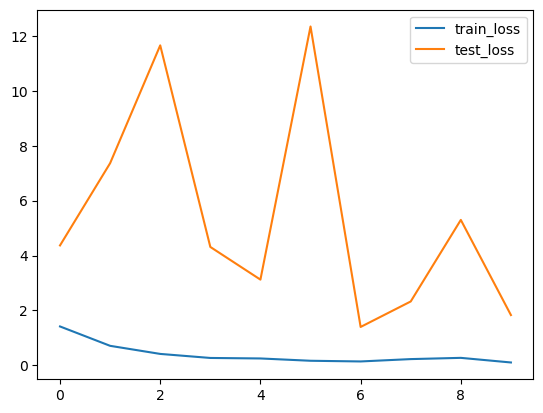

In [44]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.legend() 
plt.show()

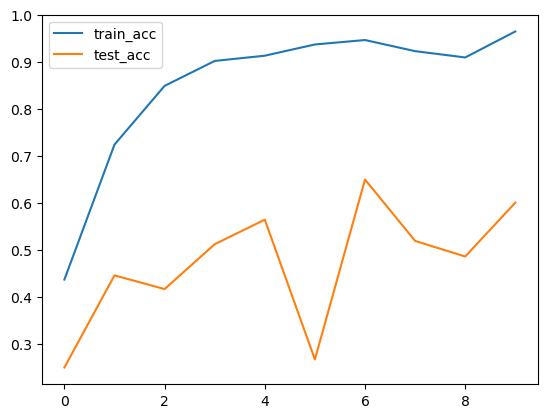

In [45]:
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

<h3>Densenet121 Implementation</h3>

In [46]:
model = DenseNet121(weights=None, input_shape=(75,75,3), classes=4)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 81, 81, 3)   0           ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 38, 38, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 38, 38, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [47]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 285s 975ms/step - loss: 0.8489 - accuracy: 0.6123 - val_loss: 3.2746 - val_accuracy: 0.2540
Epoch 2/10
249/249 [==============================] - 192s 770ms/step - loss: 0.3646 - accuracy: 0.8467 - val_loss: 16.1732 - val_accuracy: 0.3529
Epoch 3/10
249/249 [==============================] - 189s 759ms/step - loss: 0.2254 - accuracy: 0.9116 - val_loss: 14.1569 - val_accuracy: 0.2776
Epoch 4/10
249/249 [==============================] - 188s 755ms/step - loss: 0.1640 - accuracy: 0.9366 - val_loss: 22.6656 - val_accuracy: 0.2846
Epoch 5/10
249/249 [==============================] - 189s 760ms/step - loss: 0.1500 - accuracy: 0.9410 - val_loss: 114.3602 - val_accuracy: 0.2495
Epoch 6/10
249/249 [==============================] - 191s 768ms/step - loss: 0.1231 - accuracy: 0.9559 - val_loss: 7.1099 - val_accuracy: 0.3484
Epoch 7/10
249/249 [==============================] - 189s 760ms/step - loss: 0.0847 - accuracy: 0.9681 - val_loss: 16.

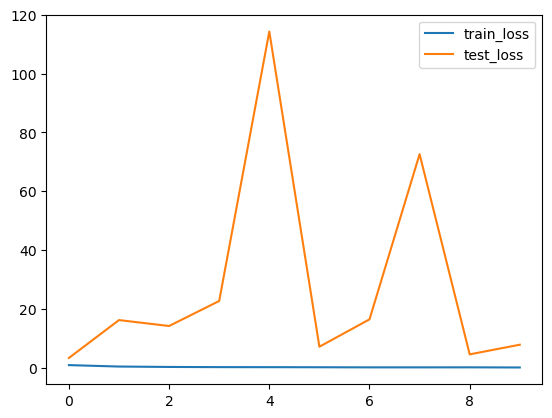

In [48]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.legend() 
plt.show()

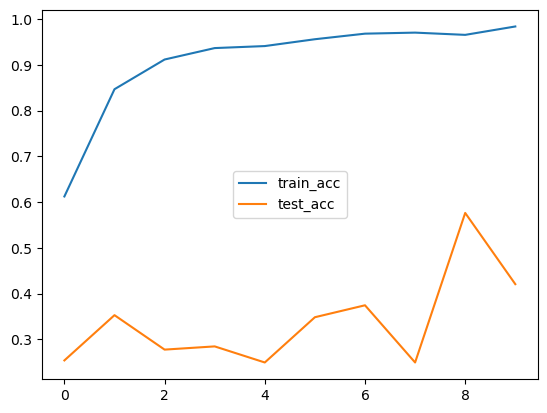

In [49]:
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

<h3>InceptionV3</h3>

In [50]:
model = InceptionV3(weights=None, input_shape=(75,75,3), classes=4)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 37, 37, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [51]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 151s 557ms/step - loss: 1.0468 - accuracy: 0.5588 - val_loss: 2.4343 - val_accuracy: 0.2510
Epoch 2/10
249/249 [==============================] - 136s 546ms/step - loss: 0.4681 - accuracy: 0.8033 - val_loss: 2.1250 - val_accuracy: 0.4111
Epoch 3/10
249/249 [==============================] - 134s 539ms/step - loss: 0.2695 - accuracy: 0.8965 - val_loss: 1.8027 - val_accuracy: 0.5833
Epoch 4/10
249/249 [==============================] - 135s 543ms/step - loss: 0.1949 - accuracy: 0.9291 - val_loss: 1.4700 - val_accuracy: 0.6707
Epoch 5/10
249/249 [==============================] - 135s 541ms/step - loss: 0.1448 - accuracy: 0.9492 - val_loss: 3.0872 - val_accuracy: 0.5366
Epoch 6/10
249/249 [==============================] - 132s 532ms/step - loss: 0.1236 - accuracy: 0.9588 - val_loss: 0.4706 - val_accuracy: 0.8404
Epoch 7/10
249/249 [==============================] - 133s 534ms/step - loss: 0.1063 - accuracy: 0.9666 - val_loss: 13.8468 

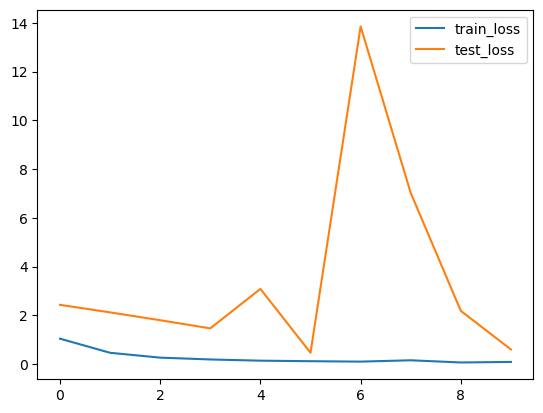

In [52]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.legend() 
plt.show()

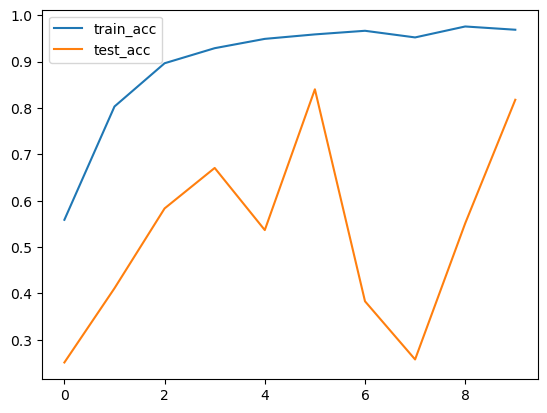

In [53]:
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

<h3>Xception</h3>

In [54]:
model = Xception(weights=None, input_shape=(75,75,3), classes=4)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 37, 37, 32)   864         ['input_7[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 37, 37, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 37, 37, 32)   0           ['block1_conv1_bn[0][0]'] 

In [55]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 244s 949ms/step - loss: 0.7836 - accuracy: 0.6490 - val_loss: 1.3944 - val_accuracy: 0.2887
Epoch 2/10
249/249 [==============================] - 237s 952ms/step - loss: 0.3504 - accuracy: 0.8638 - val_loss: 1.7494 - val_accuracy: 0.4398
Epoch 3/10
249/249 [==============================] - 237s 952ms/step - loss: 0.2237 - accuracy: 0.9170 - val_loss: 2.5679 - val_accuracy: 0.5402
Epoch 4/10
249/249 [==============================] - 240s 963ms/step - loss: 0.1520 - accuracy: 0.9445 - val_loss: 3.3042 - val_accuracy: 0.6039
Epoch 5/10
249/249 [==============================] - 266s 1s/step - loss: 0.1055 - accuracy: 0.9628 - val_loss: 8.8356 - val_accuracy: 0.3238
Epoch 6/10
249/249 [==============================] - 263s 1s/step - loss: 0.0792 - accuracy: 0.9700 - val_loss: 2.8703 - val_accuracy: 0.5462
Epoch 7/10
249/249 [==============================] - 251s 1s/step - loss: 0.0905 - accuracy: 0.9685 - val_loss: 0.7270 - val_accu

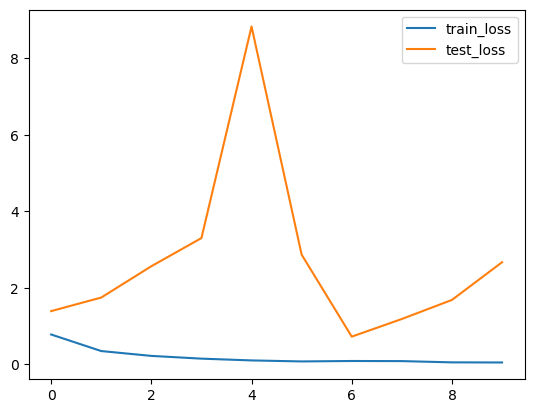

In [56]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.legend() 
plt.show()

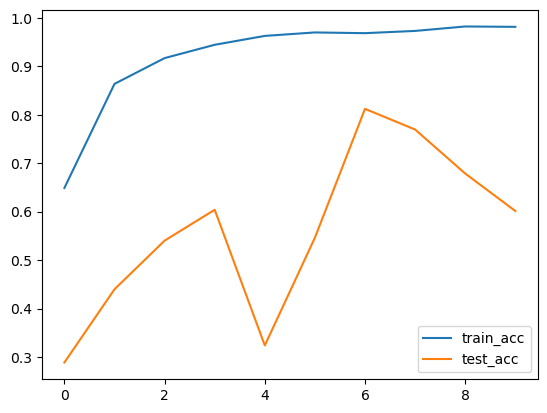

In [57]:
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()